In [90]:
###############################

# NAME - Rakshit Tiwari
# B.Tech Mathemmatics and Computing
# Roll - 160123032

###############################

import numpy as np
import sklearn
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import math

import pandas as pd

In [54]:
d = np.loadtxt('d.txt', skiprows = 1)

In [55]:
d = pd.DataFrame(d)
d.columns = ['Date' , 'C' , 'SP']

In [56]:
c = d['C']
sp = d['SP'] 

Text(0.5, 1.0, 'Returns of Normal C')

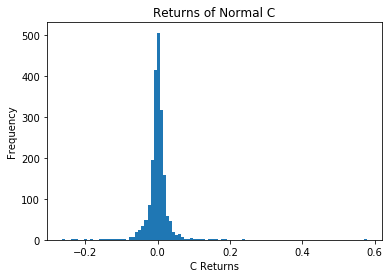

In [57]:
n , bins , patches = plt.hist(c , 100)
plt.xlabel('C Returns')
plt.ylabel('Frequency')
plt.title('Returns of Normal C')

Text(0.5, 1.0, 'Returns of Normal SP')

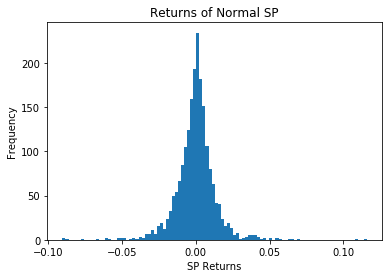

In [58]:
n , bins , patches = plt.hist(sp , 100)
plt.xlabel('SP Returns')
plt.ylabel('Frequency')
plt.title('Returns of Normal SP')

In [59]:
log_c = np.log(1 + c)
log_sp = np.log(1 + sp)

Text(0.5, 1.0, 'Returns of Log C')

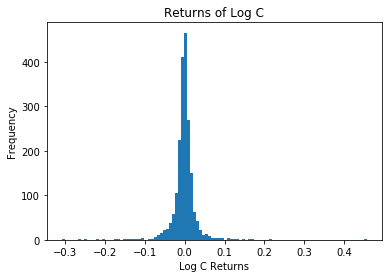

In [60]:
n , bins , patches = plt.hist(log_c , 100)
plt.xlabel('Log C Returns')
plt.ylabel('Frequency')
plt.title('Returns of Log C')

Text(0.5, 1.0, 'Returns of Log SP')

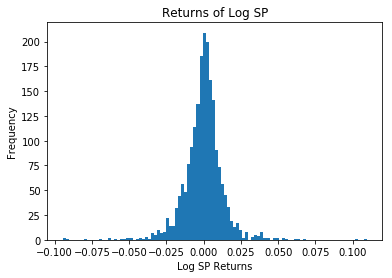

In [61]:
n , bins , patches = plt.hist(log_sp , 100)
plt.xlabel('Log SP Returns')
plt.ylabel('Frequency')
plt.title('Returns of Log SP')

In [62]:
mean_c = statistics.mean(log_c)
mean_sp = statistics.mean(log_sp)

In [88]:
print("The mean for C and SP :\n" , round(mean_c , 6),
      "and" , round(mean_sp , 6) , "respectively")

The mean for C and SP :
 -0.000845 and -0.000189 respectively


In [67]:
print("We can see from the data itself that the mean is quite close to 0.")

We can see from the data itself that the mean is quite close to 0.


In [68]:
########### WORKING ON QUESTION-1 PART (I) NOW #############

In [69]:
########### FOR FINDING CONFIDENCE INTERVAL,
########### WE WILL BE USING SCIPY LIBRARY IN PYTHON

In [70]:
from scipy.stats import sem , t, norm
from scipy import mean
import scipy

# For C - rtn #
n = len(log_c)
confidence = 0.95
m = mean(log_c)
sd = math.sqrt(statistics.variance(log_c))

term = t.ppf((1 + confidence) / 2 , n - 1)
start_c = m - (term * sd / math.sqrt(n))
end_c = m + (term * sd / math.sqrt(n))

# start_c , end_c = scipy.stats.norm.interval(confidence, loc=m, scale=sd)

In [73]:
print("The confidence interval for log rtn of C is b/w :\n", 
      round(start_c , 7) , "and" , round( end_c , 7))

The confidence interval for log rtn of C is b/w :
 -0.0021755 and 0.0004859


In [74]:
# For SP - rtn #

n = len(log_sp)
confidence = 0.95
m = mean(log_sp)
sd = math.sqrt(statistics.variance(log_sp))

term = t.ppf((1 + confidence) / 2 , n - 1)
start_sp = m - (term * sd / math.sqrt(n))
end_sp = m + (term * sd / math.sqrt(n))

In [75]:
print("The confidence interval for log rtn of SP is b/w :\n",
      round(start_sp , 7) , "and" , round(end_sp , 7))

The confidence interval for log rtn of SP is b/w :
 -0.0007818 and 0.0004043


In [76]:
def permutation(lst):
    
   # print(len(lst))
    if(len(lst) == 0) :
        return []
    if(len(lst) == 1) :
        return [lst]
    l = []
    for i in range(len(lst)) :
            m = lst[i]
            
            remlst = lst[:i] + lst[i + 1 : ]
            for p in permutation(remlst) :
                l.append([m] + p)
                
    return l

In [82]:
### Finding the coverage probability of log_c

import random
collection = []

cnt = 600
for i in range(1 , cnt) :
    collect = []
    for j in range(1 , 1500) :
        starting_index = random.randint(1 , 2000)
        collect.append(log_c[starting_index])
    collection.append(collect)

In [83]:
count_lying_between = 0
for i in range(0 , cnt - 1) :
    mean = statistics.mean(collection[i])
    if(mean <= end_c and mean >= start_c) :
        count_lying_between = count_lying_between + 1
    else :
        continue
       # print(mean)

coverage_prob = (count_lying_between) / cnt
print("The coverage Probability for log of C is : \n",
      round(coverage_prob , 10))

The coverage Probability for log of C is : 
 0.89


In [84]:
### Finding the coverage probability of log_sp

import random
collection = []

cnt = 600
for i in range(1 , cnt) :
    collect = []
    for j in range(1 , 1500) :
        starting_index = random.randint(1 , 2000)
        collect.append(log_sp[starting_index])
    collection.append(collect)
    
count_lying_between = 0
for i in range(0 , cnt - 1) :
    mean = statistics.mean(collection[i])
    if(mean <= end_sp and mean >= start_sp) :
        count_lying_between = count_lying_between + 1
    else :
        continue
       # print(mean)

coverage_prob_sp = (count_lying_between) / cnt
print("The coverage probability for log of sp is \n", 
      round(coverage_prob_sp , 10))

The coverage probability for log of sp is 
 0.89


In [86]:
def find_coverage_probability(a , samples , size, total) :
    collection = []
    cnt = samples
    
    n = len(a)
    confidence = 0.95
    m = statistics.mean(a)
    sd = math.sqrt(statistics.variance(a))

    term = t.ppf((1 + confidence) / 2 , n - 1)
    start = m - (term * sd / math.sqrt(n))
    end = m + (term * sd / math.sqrt(n))
    
    for i in range(1 , cnt) :
        collect = []
        for j in range(1 , size) :
            starting_index = random.randint(1 , total)
            collect.append(a[starting_index])
        collection.append(collect)
    
    count_lying_between = 0
    for i in range(0 , cnt - 1) :
        mean = statistics.mean(collection[i])
        if(mean <= end and mean >= start) :
            count_lying_between = count_lying_between + 1
        else :
            continue
           # print(mean)

    coverage_prob_sp = (count_lying_between) / cnt
    print("The coverage probability for log of sp is \n"
          , round(coverage_prob_sp , 10))

In [89]:

############### Part - b of the assignment #####################
sizes = [20 , 50 , 100]

# Generating a number between 0 and 1

prob = 0.6

cnt = 1000
bernoulli = []

positive = 0

for i in range(1 , cnt + 1) :
    xi = random.random()
    if(xi <= 0.6) :
        positive = positive + 1
        bernoulli.append(1)
    else :
        bernoulli.append(0)

phat = positive / cnt
start = phat - (1.95 / math.sqrt(cnt)) * (math.sqrt(phat * (1 - phat)))
end = phat + (1.95 / math.sqrt(cnt)) * (math.sqrt(phat * (1 - phat)))

probabilites = []
for sz in sizes :
    total = 0
    for k in range(1 , cnt) :
        count = 0
        for j in range(0 , sz) :
            xi = random.randint(0 , cnt - 1)
            if(bernoulli[xi] == 1) :
                count = count + 1
        if(count / sz <= end and count / sz >= start) :
            total = total + 1
    probabilites.append(total / (cnt))

for i in range(0 , len(probabilites)):
    print("The final coverage probability for size ="
          ,sizes[i] , "is" , round(probabilites[i], 10))

The final coverage probability for size = 20 is 0.2
The final coverage probability for size = 50 is 0.328
The final coverage probability for size = 100 is 0.448
